In [8]:
import pandas as pd
from re import sub as regex
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import ComplementNB
from nltk.stem import PorterStemmer as Stemmer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv("undersampled_spam.csv", encoding="latin")
df = df.drop(columns=["Unnamed: 0"])
df.sample(5)

,type,sms,processedSMS,filteredSMS
367,0,"I can't speak, bcaz mobile have problem. I can...",speak bcaz mobil problem listen cann listen vo...,"['speak', 'bcaz', 'mobil', 'problem', 'listen'..."
1269,1,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...,free rington repli real poli eg real1 1 pushbu...,"['free', 'rington', 'repli', 'real', 'poli', '..."
1352,1,Latest Nokia Mobile or iPOD MP3 Player + 400 ...,latest nokia mobil ipod mp3 player 400 proze g...,"['latest', 'nokia', 'mobil', 'ipod', 'mp3', 'p..."
549,0,Don't make life too stressfull.. Always find t...,make life stressful alway find time laugh may ...,"['make', 'life', 'stressful', 'alway', 'find',..."
629,0,No you'll just get a headache trying to figure...,get headach tri figur u trust math promis,"['get', 'headach', 'tri', 'figur', 'u', 'trust..."


In [10]:
def preprocess(sms):
    # Lower case
    sms = sms.lower()
    # Removes special characters - only letters and numbers remain + lowers text
    sms = regex(r"[^a-zA-Z0-9]", " ", sms)
    # Utilizes NLTK to tokenize text
    sms = word_tokenize(sms)
    # Utilizes removes NLTK stopwords from sms
    sms = [word for word in sms if word not in stopwords.words("english")]
    # Utilizes NLTK Stemmer to stem words
    sms = [Stemmer().stem(word) for word in sms]
    return [" ".join(sms)]

In [11]:
def predict(model, sms, label):
    print(f"Correct: {label} - Prediction - {model.predict(preprocess(sms))}")

In [12]:
def run(model):
    print(model)

    # Loading Data
    df = pd.read_csv("undersampled_spam.csv", encoding="latin")
    df = df.dropna()

    # Splitting Data
    features, labels = df["processedSMS"] , df["type"]
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=2022, stratify=labels)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=2022, stratify=y_test)

    # Train Model
    pipeline = Pipeline([("vector", TfidfVectorizer()), ("model", model)]).fit(x_train, y_train)

    # Validate Model
    print("Validation Results:")
    y_pred = pipeline.predict(x_val)
    print(classification_report(y_val, y_pred))

    # Test Model
    print("Testing Results:")
    y_pred = pipeline.predict(x_test)
    print(classification_report(y_test, y_pred))

    # More Testing Results
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0)}")
    rc1, rc2, rc3 = precision_recall_curve(y_test, y_pred)
    print(f"PR_AUC: {auc(rc2,  rc1)}")
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
    plt.show()

    # Test Model on real-life sms
    predict(pipeline, "how is your day going?", 0)
    predict(pipeline, "wanna go to the park?", 0)
    predict(pipeline, "bro, the movie was great! You should watch it too.", 0)
    predict(pipeline, "free $50 amazon gift card reply back now", 1)
    predict(pipeline, "Bank of America closed your bank account. Please confirm your pin at bankofamerica.com/cx1234124r1234vb to keep your account activated", 1)
    predict(pipeline, "You've won a prize! Go to bit.ly/yourprize001 to claim your $500 Amazon gift card", 1)

<p style="text-align: center;">ComplementNB</p>

ComplementNB()
Validation Results:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       112
           1       0.93      0.98      0.96       112

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

Testing Results:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       112
           1       0.94      0.97      0.96       112

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

Accuracy: 0.9553571428571429
Precision: 0.9396551724137931
Recall: 0.9732142857142857
PR_AUC: 0.963131157635468


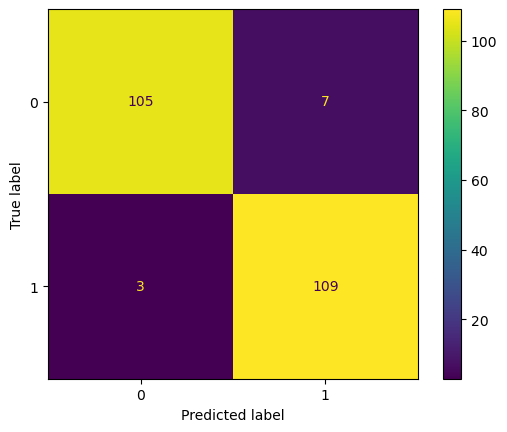

Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [1]


In [13]:
run(ComplementNB())

<p style="text-align: center;">Neural Network</p>

MLPClassifier(max_iter=3000)
Validation Results:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       112
           1       0.95      0.94      0.94       112

    accuracy                           0.94       224
   macro avg       0.94      0.94      0.94       224
weighted avg       0.94      0.94      0.94       224

Testing Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       112
           1       0.96      0.97      0.97       112

    accuracy                           0.97       224
   macro avg       0.97      0.97      0.97       224
weighted avg       0.97      0.97      0.97       224

Accuracy: 0.96875
Precision: 0.9646017699115044
Recall: 0.9732142857142857
PR_AUC: 0.9756044563843236


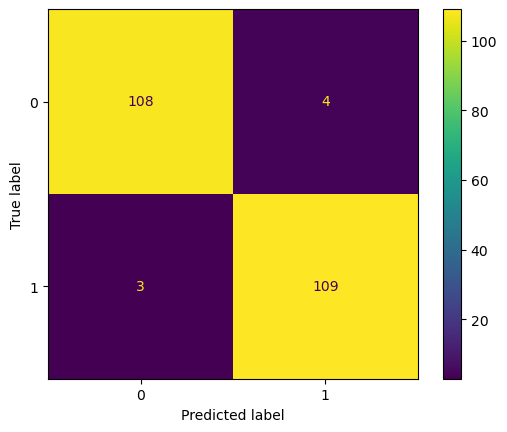

Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 0 - Prediction - [0]
Correct: 1 - Prediction - [1]
Correct: 1 - Prediction - [0]
Correct: 1 - Prediction - [1]


In [14]:
run(MLPClassifier(max_iter=3000))